<a href="https://colab.research.google.com/github/DataGalz/DataGalz/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages 

In [135]:

url = 'https://raw.githubusercontent.com/DataGalz/DataGalz/main/CPI_MONTHLY.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
print(df)



           date  Total_CPI  Total_CPI.1  ...  CPIX  CPI_XFET  CPIW
0    1995-01-01       86.6         86.6  ...   NaN       2.2   1.7
1    1995-02-01       87.0         87.0  ...   NaN       1.8   1.7
2    1995-03-01       87.2         87.2  ...   NaN       2.1   1.9
3    1995-04-01       87.5         87.4  ...   NaN       2.1   2.0
4    1995-05-01       87.7         87.7  ...   NaN       2.5   2.2
..          ...        ...          ...  ...   ...       ...   ...
315  2021-04-01      140.3        140.0  ...   2.3       1.8   2.6
316  2021-05-01      141.0        140.5  ...   2.8       2.4   3.0
317  2021-06-01      141.4        140.8  ...   2.7       2.2   3.0
318  2021-07-01      142.3        141.6  ...   3.3       2.8   3.3
319  2021-08-01      142.6        142.2  ...   3.5       3.0   3.4

[320 rows x 10 columns]


In [136]:
df.head

<bound method NDFrame.head of            date  Total_CPI  Total_CPI.1  ...  CPIX  CPI_XFET  CPIW
0    1995-01-01       86.6         86.6  ...   NaN       2.2   1.7
1    1995-02-01       87.0         87.0  ...   NaN       1.8   1.7
2    1995-03-01       87.2         87.2  ...   NaN       2.1   1.9
3    1995-04-01       87.5         87.4  ...   NaN       2.1   2.0
4    1995-05-01       87.7         87.7  ...   NaN       2.5   2.2
..          ...        ...          ...  ...   ...       ...   ...
315  2021-04-01      140.3        140.0  ...   2.3       1.8   2.6
316  2021-05-01      141.0        140.5  ...   2.8       2.4   3.0
317  2021-06-01      141.4        140.8  ...   2.7       2.2   3.0
318  2021-07-01      142.3        141.6  ...   3.3       2.8   3.3
319  2021-08-01      142.6        142.2  ...   3.5       3.0   3.4

[320 rows x 10 columns]>

In [137]:
df.tail

<bound method NDFrame.tail of            date  Total_CPI  Total_CPI.1  ...  CPIX  CPI_XFET  CPIW
0    1995-01-01       86.6         86.6  ...   NaN       2.2   1.7
1    1995-02-01       87.0         87.0  ...   NaN       1.8   1.7
2    1995-03-01       87.2         87.2  ...   NaN       2.1   1.9
3    1995-04-01       87.5         87.4  ...   NaN       2.1   2.0
4    1995-05-01       87.7         87.7  ...   NaN       2.5   2.2
..          ...        ...          ...  ...   ...       ...   ...
315  2021-04-01      140.3        140.0  ...   2.3       1.8   2.6
316  2021-05-01      141.0        140.5  ...   2.8       2.4   3.0
317  2021-06-01      141.4        140.8  ...   2.7       2.2   3.0
318  2021-07-01      142.3        141.6  ...   3.3       2.8   3.3
319  2021-08-01      142.6        142.2  ...   3.5       3.0   3.4

[320 rows x 10 columns]>

In [138]:
df.describe

<bound method NDFrame.describe of            date  Total_CPI  Total_CPI.1  ...  CPIX  CPI_XFET  CPIW
0    1995-01-01       86.6         86.6  ...   NaN       2.2   1.7
1    1995-02-01       87.0         87.0  ...   NaN       1.8   1.7
2    1995-03-01       87.2         87.2  ...   NaN       2.1   1.9
3    1995-04-01       87.5         87.4  ...   NaN       2.1   2.0
4    1995-05-01       87.7         87.7  ...   NaN       2.5   2.2
..          ...        ...          ...  ...   ...       ...   ...
315  2021-04-01      140.3        140.0  ...   2.3       1.8   2.6
316  2021-05-01      141.0        140.5  ...   2.8       2.4   3.0
317  2021-06-01      141.4        140.8  ...   2.7       2.2   3.0
318  2021-07-01      142.3        141.6  ...   3.3       2.8   3.3
319  2021-08-01      142.6        142.2  ...   3.5       3.0   3.4

[320 rows x 10 columns]>

In [139]:
min(df.date)

'1995-01-01'

In [140]:
max(df.date)

'2021-08-01'

In [141]:
df.isnull()

,date,Total_CPI,Total_CPI.1,CPI_CHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,CPIX,CPI_XFET,CPIW
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
315,False,False,False,False,False,False,False,False,False,False
316,False,False,False,False,False,False,False,False,False,False
317,False,False,False,False,False,False,False,False,False,False
318,False,False,False,False,False,False,False,False,False,False


,Total_CPI,Total_CPI.1,CPI_CHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,CPIX,CPI_XFET,CPIW
Total_CPI,1.000000,0.999750,-0.105974,0.208047,0.311711,-0.025982,-0.163817,-0.045210,0.048073
Total_CPI.1,0.999750,1.000000,-0.107339,0.207153,0.311404,-0.025684,-0.166175,-0.046479,0.046378
CPI_CHANGE,-0.105974,-0.107339,1.000000,0.496299,0.369052,0.177739,0.405576,0.527700,0.664834
CPI_TRIM,0.208047,0.207153,0.496299,1.000000,0.902208,0.562061,0.607177,0.658150,0.818318
CPI_MEDIAN,0.311711,0.311404,0.369052,0.902208,1.000000,0.648444,0.566539,0.503890,0.712924
CPI_COMMON,-0.025982,-0.025684,0.177739,0.562061,0.648444,1.000000,0.375300,0.192512,0.600054
CPIX,-0.163817,-0.166175,0.405576,0.607177,0.566539,0.375300,1.000000,0.746050,0.790238
CPI_XFET,-0.045210,-0.046479,0.527700,0.658150,0.503890,0.192512,0.746050,1.000000,0.738799
CPIW,0.048073,0.046378,0.664834,0.818318,0.712924,0.600054,0.790238,0.738799,1.000000


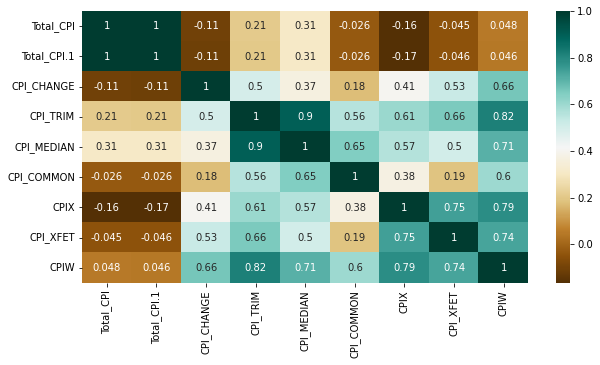

In [142]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [143]:
df.dtypes

date            object
Total_CPI      float64
Total_CPI.1    float64
CPI_CHANGE     float64
CPI_TRIM       float64
CPI_MEDIAN     float64
CPI_COMMON     float64
CPIX           float64
CPI_XFET       float64
CPIW           float64
dtype: object

In [144]:
df = df.drop(['Total_CPI','CPI_TRIM', 'Total_CPI.1','CPI_COMMON'], axis=1)
df.head(5)

,date,CPI_CHANGE,CPI_MEDIAN,CPIX,CPI_XFET,CPIW
0,1995-01-01,0.6,1.8,NaN,2.2,1.7
1,1995-02-01,1.9,1.8,NaN,1.8,1.7
2,1995-03-01,2.1,1.8,NaN,2.1,1.9
3,1995-04-01,2.5,2.0,NaN,2.1,2.0
4,1995-05-01,2.9,2.1,NaN,2.5,2.2


,CPI_CHANGE,CPI_MEDIAN,CPIX,CPI_XFET,CPIW
CPI_CHANGE,1.000000,0.369052,0.405576,0.527700,0.664834
CPI_MEDIAN,0.369052,1.000000,0.566539,0.503890,0.712924
CPIX,0.405576,0.566539,1.000000,0.746050,0.790238
CPI_XFET,0.527700,0.503890,0.746050,1.000000,0.738799
CPIW,0.664834,0.712924,0.790238,0.738799,1.000000


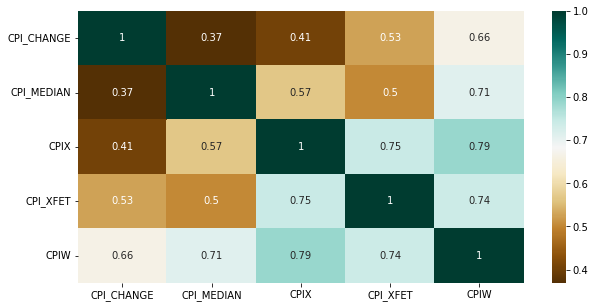

In [145]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

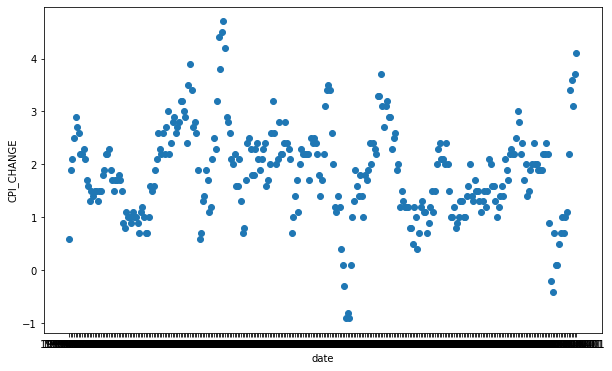

In [146]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['date'], df['CPI_CHANGE'])
ax.set_xlabel('date')
ax.set_ylabel('CPI_CHANGE')
plt.show()

Text(0.5, 1.0, 'Min, Max and STD of CPI Trim by date')

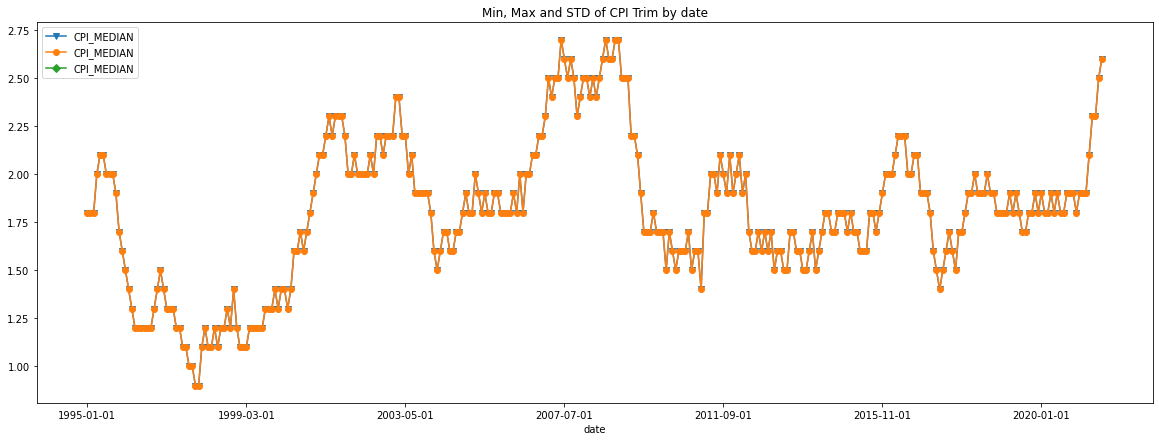

In [149]:
date_CPI_Median_Min = df.groupby('date')['CPI_MEDIAN'].min().plot(kind = 'line', legend = True, figsize = (20,7),marker = 'v')
date_CPI_Median_Max = df.groupby('date')['CPI_MEDIAN'].max().plot(kind = 'line', legend = True, figsize = (20,7),marker = 'o')
date_CPI_Median_avg = df.groupby('date')['CPI_MEDIAN'].std().plot(kind = 'line', legend = True, figsize = (20,7),marker = 'D')
plt.title('Min, Max and STD of CPI Trim by date')